----------------
<font face="华文行楷" size=20 >求根公式</font> 

#### >`翟家辉 19720212203881`

### 一、常见求根法

> ### 1. **二分法**
   对于连续函数 $f(x)=0$，如果在区间$[a,b]$上满足：$f(a)·f(b)<0$，则区间$[a,b]$内至少存在一点 $\epsilon$ 使得 $f(\epsilon)=0$ 。其基本思想是取区间中点$c= \frac{a+b}{2}$，如果 $f(a)f(c)<0$ ，则根位于区间 $[a,c]$ 内，如果 $f(b)f(c)<0$ ，则根位于区间$[c,b]$内。以此类推，直到当前根的函数值位于误差可接受范围之内。
   
> ### 2. **梯度下降法**
   函数$f(x)$下降最快的方向是梯度的反方向，可通过选取适当的初值 $x^{(0)}$，不断迭代更新$x$的取值，使目标函数极小化，直到在满足误差条件的情况下取得局部最小值。即 $x^{k+1}=x^{k}-\lambda_kf'(x_k)$。
   对于本例而言，可构建 $y=\frac{(x^9-2022)^2}{2}$ 并求其零点，此时迭代式为：$$x^{k+1}=x^{k}-\lambda_k9x^8(x^9-2022)$$
   
> ### 3. **牛顿迭代法**
   不妨设 $x_k$ 为方程 $f(x)=0$ 的根，选取 $x_0$ 为其初始近似值，可过点$(x_0,f(x_0)$做方程$f(x)=0$的切线$L:y=f(x_0)+f'(x_0)(x-x_0)$，其与$x$轴交点为$x_1=x_0-\frac{f(x_0)}{f'(x_0)}$。再在点 $(x_1,f(x_1))$ 处做斜率为 $f'(x_0)$ 的切线，重复以上操作得迭代公式 $x_{n+1}=x_n-\frac{f(x_n)}{f^{'}(x_n))}$，再此例中为：
   $$x_{n+1}=x_n-\frac{{x_n}^9-2022}{9{x_n}^8}$$

### 二、实例计算 ($ \sqrt[9]{2022}=x$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

>##### 1.逼近方法——二分法模块

In [2]:
def erfen(crf):
    x = (crf[0]+crf[1])/2
    crf[6] = 0
    n = eval(crf[3])
    if n>crf[2]:
        crf[1]=x
    elif n<crf[2]:
        crf[0]=x
    if abs(n-crf[2])<crf[4]:
        crf[6] = 1
    return crf


>##### 1.逼近方法——梯度下降法模块

In [3]:
def tidu(crf):
    x = crf[0]
    crf[6] = 0
    a=10**crf[7]
    x = x-a*9*x**8*(x**9-2022)
    crf[0]=x
    return crf

>##### 1.逼近方法——牛顿迭代法模块

In [4]:
def niudun(crf):
    crf[0] = crf[0]-(crf[0]**9-2022)/(9*crf[0]**8)
    return crf

>##### 2. 结束控制——精度 ( $10^{-i}$)

In [5]:
def jingdu(crf1,i):
    while crf1[6]!= 1:
        crf1 = eval(crf1[5])(crf1)
    return crf1[0]

>##### 2. 结束控制——循环次数 ( $10^{i}$)

In [6]:
def xunhuan(crf1,i):
    for xxx in range(10**i):
        crf1= eval(crf1[5])(crf1)
    return crf1[0]

>##### 3. 绘图控制——散点图（二分法演示精度不同根的取值）

In [7]:
def main01(color,N,KongZhi,BiJin,chuzhi):
    x0=np.linspace(-2,N,N+3)
    s=np.zeros(N+3,)
    y11=np.zeros(N+3,)
    x1=np.asarray(10**(-x0))
    s=np.zeros(N+3,)
    xs = []
    for i1 in range(N+3):
        xs.append([])
    for i in range(0,N+3):
        xs[i]=[chuzhi,4,2022,"x**9",x1[i],BiJin,s[i],0,i]
        y11[i]=eval(KongZhi)(xs[i],i)
    plt.scatter(x0,y11,c=color)
    print('''
    KongZhi：代表散点图时，x轴的单位 
    N；代表循环数10^N或精度10^-N
    ''')
    plt.show()

>##### 3. 绘图控制——循环次数连续图

In [8]:
def main02(color,N,KongZhi,BiJin,a,chuzhi):
    y21=[]
    x0 = np.linspace(0,10**(N-1),10**(N-1))
    cishu=10**(N-1)
    xs = [chuzhi,chuzhi+2,2022,"x**9",0,BiJin,0,a]
    for i in range(cishu):
        s=eval(BiJin)(xs)
        xs[0]=s[0]
        y21.append(s[0])
    plt.plot(x0,y21,c=color,linewidth=1)
    print(10**(N-1),"次迭代后求得的2022的9次方根是",y21[-1])
    plt.show()

>##### 4. 主函数

In [9]:
def main(color,N,KongZhi,BiJin,a,tu,chuzhi):
    #if (BiJin=="erfen")and(tu=="sandian"):
    if tu=="sandian":
        main01(color,N,KongZhi,BiJin,chuzhi)
    else:
        main02(color,N,KongZhi,BiJin,a,chuzhi)
        

widgets.interactive(main,chuzhi=(1,3,0.1),color=["r","b","y","g"],N=(1,6,1),BiJin=["erfen","tidu","niudun"],KongZhi=["jingdu","xunhuan"],a=(-10,-6,0.01,),tu=["lianxu","sandian"])    

interactive(children=(Dropdown(description='color', options=('r', 'b', 'y', 'g'), value='r'), IntSlider(value=…

说明：
        
BiJin：代表不同的逼近类型（求根方法）；
a：只在梯度下降法起着作用，是其步长（学习率）；
N：代表循环次数10^N次；

 ### 三、步长影响（梯度下降）

给定初值为2，循环周期100次，步长a的取值不同，结果迥异。


-----------------------------------------------
（1）a处于$10^{-10}$到$10^{-8.80}$时，难以在100次循环内取得较好的拟合效果。
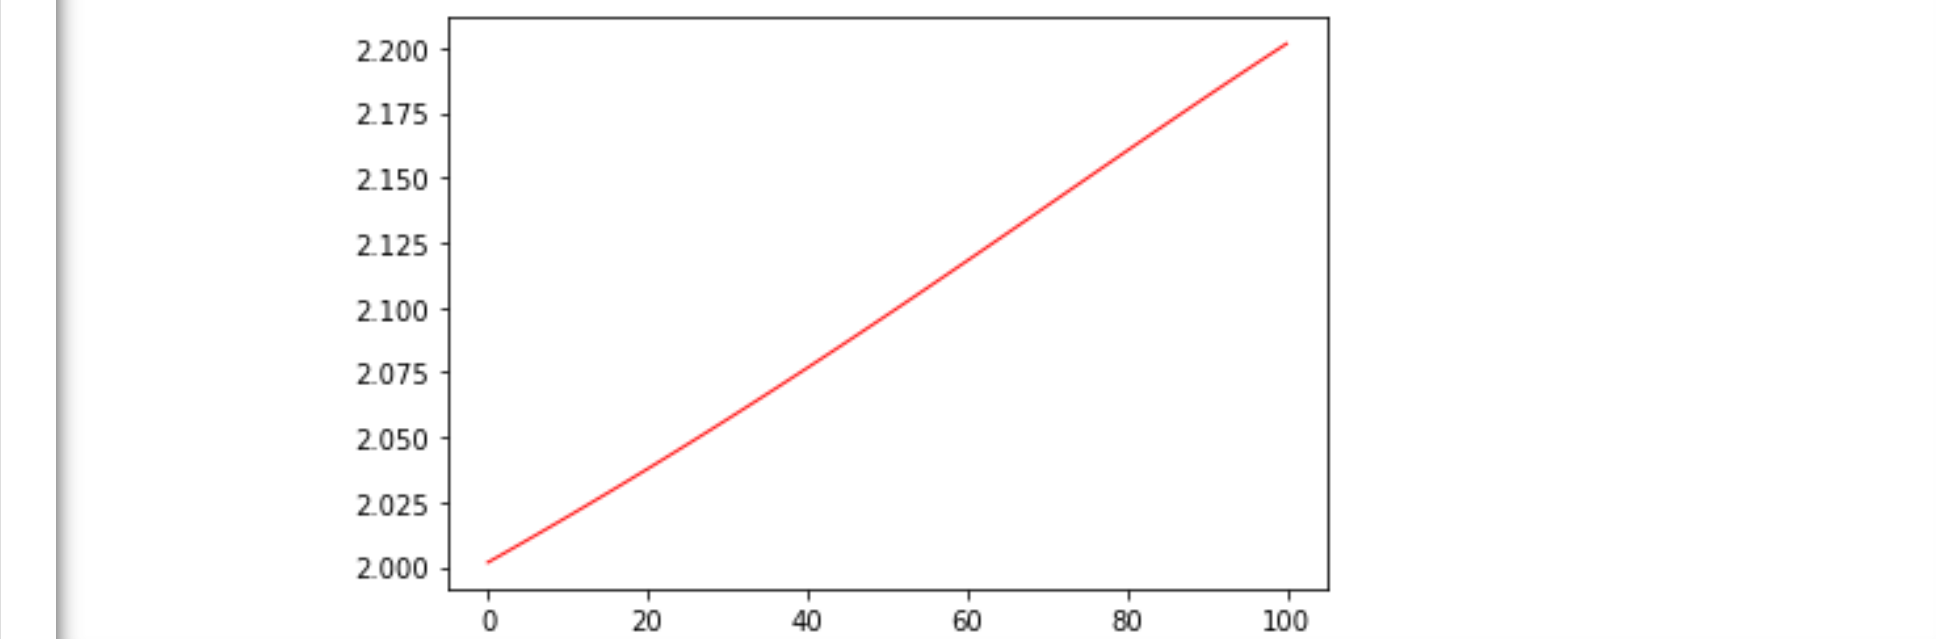

-----------------------------------------------
（2）a处于$10^{-8.80}$到$10^{-7.50}$时，可以在100次循环内取得较好的拟合效果，a的取值越小，达到同样拟合效果所需的循环数越多。
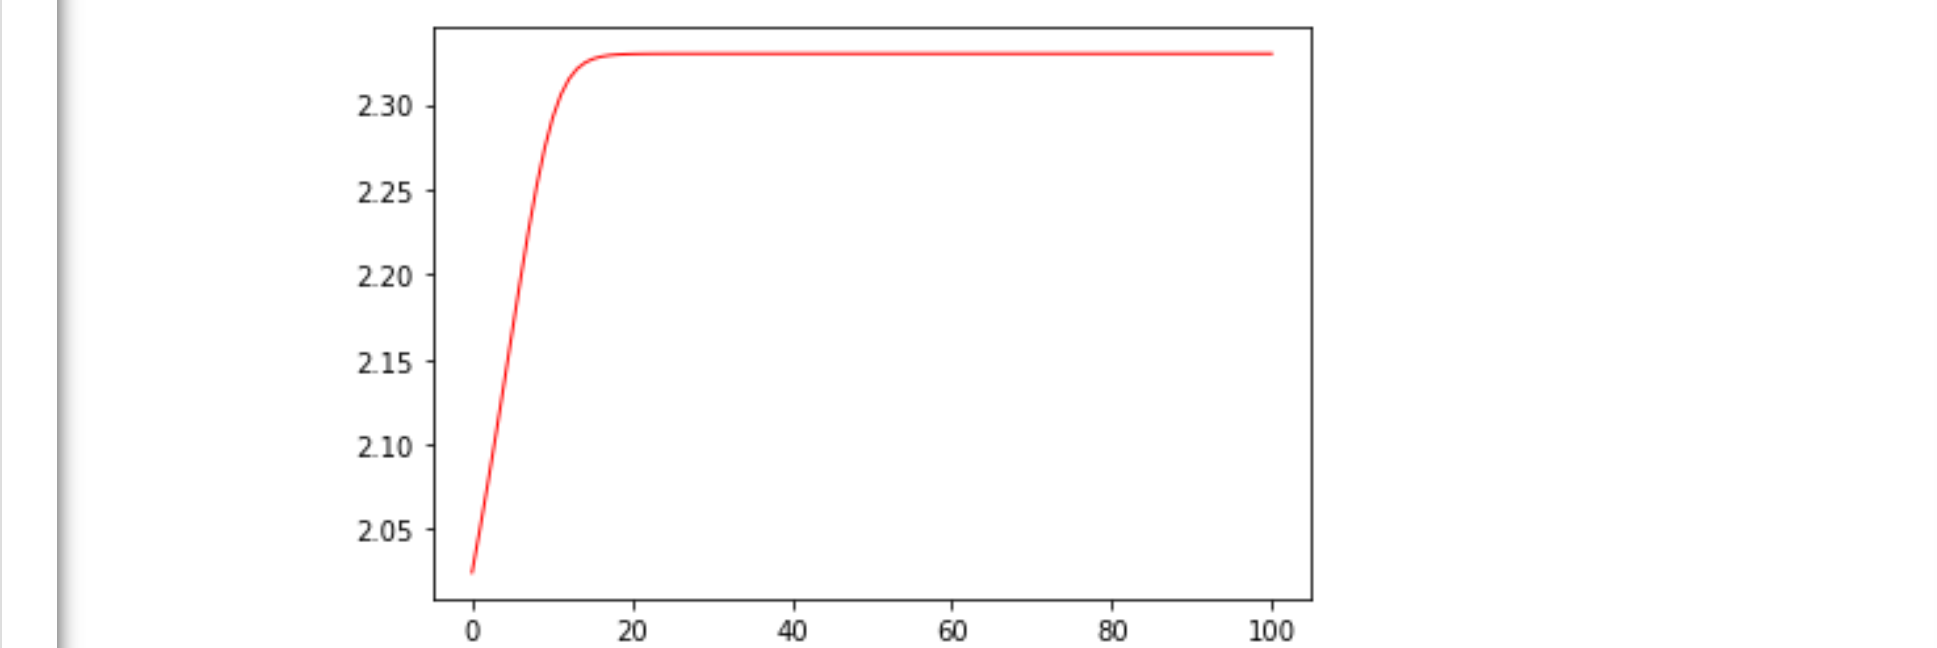

-----------------------------------------------
（3）a处于$10^{-7.45}$到$10^{-7.30}$时，呈周期变动，无法取得拟合值。
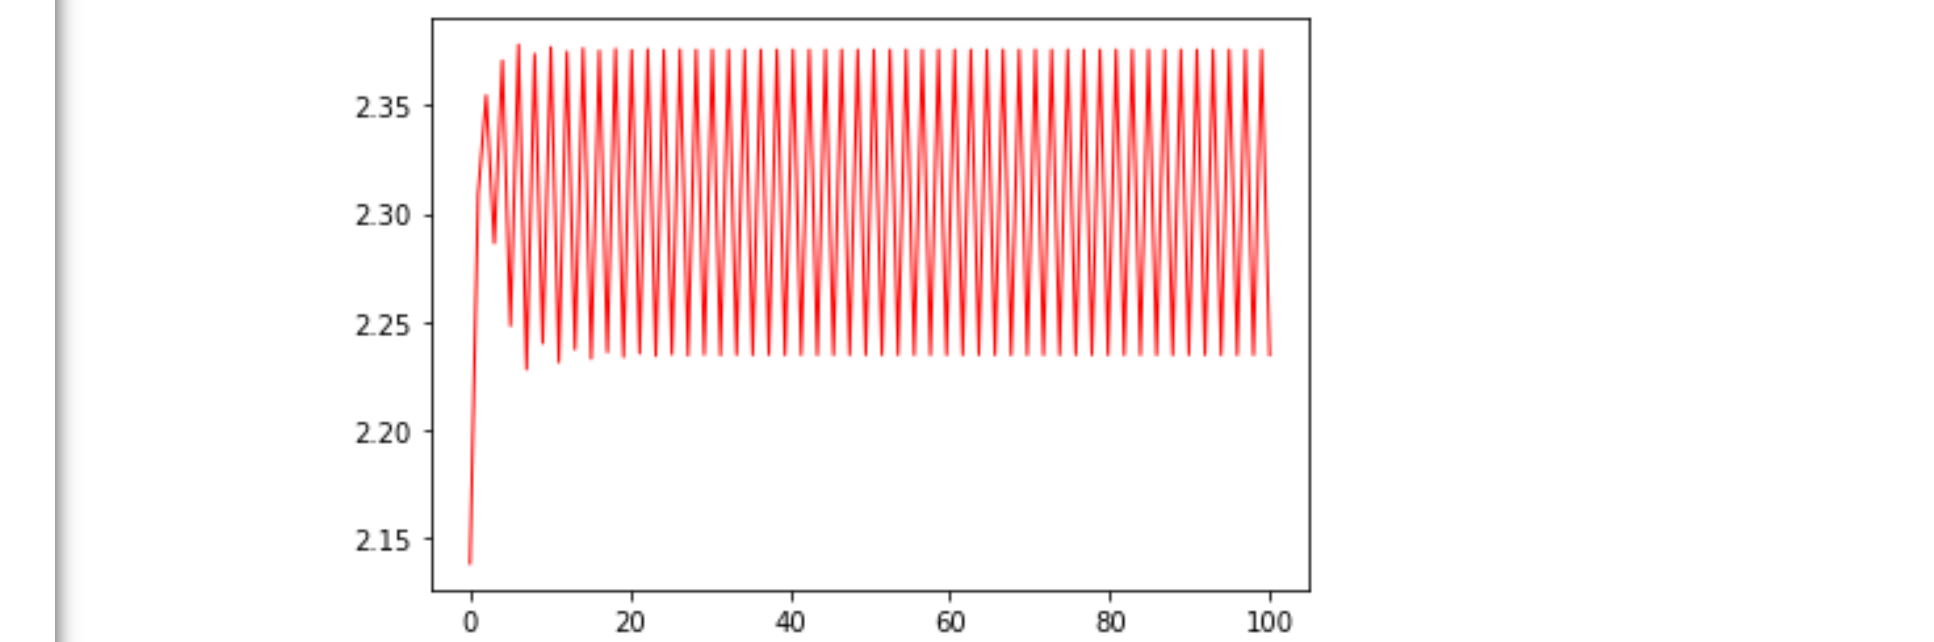

-----------------------------------------------
（4）a处于$10^{-7.25}$到$10^{-7.0}$时，无法正确拟合，取值混乱变化。
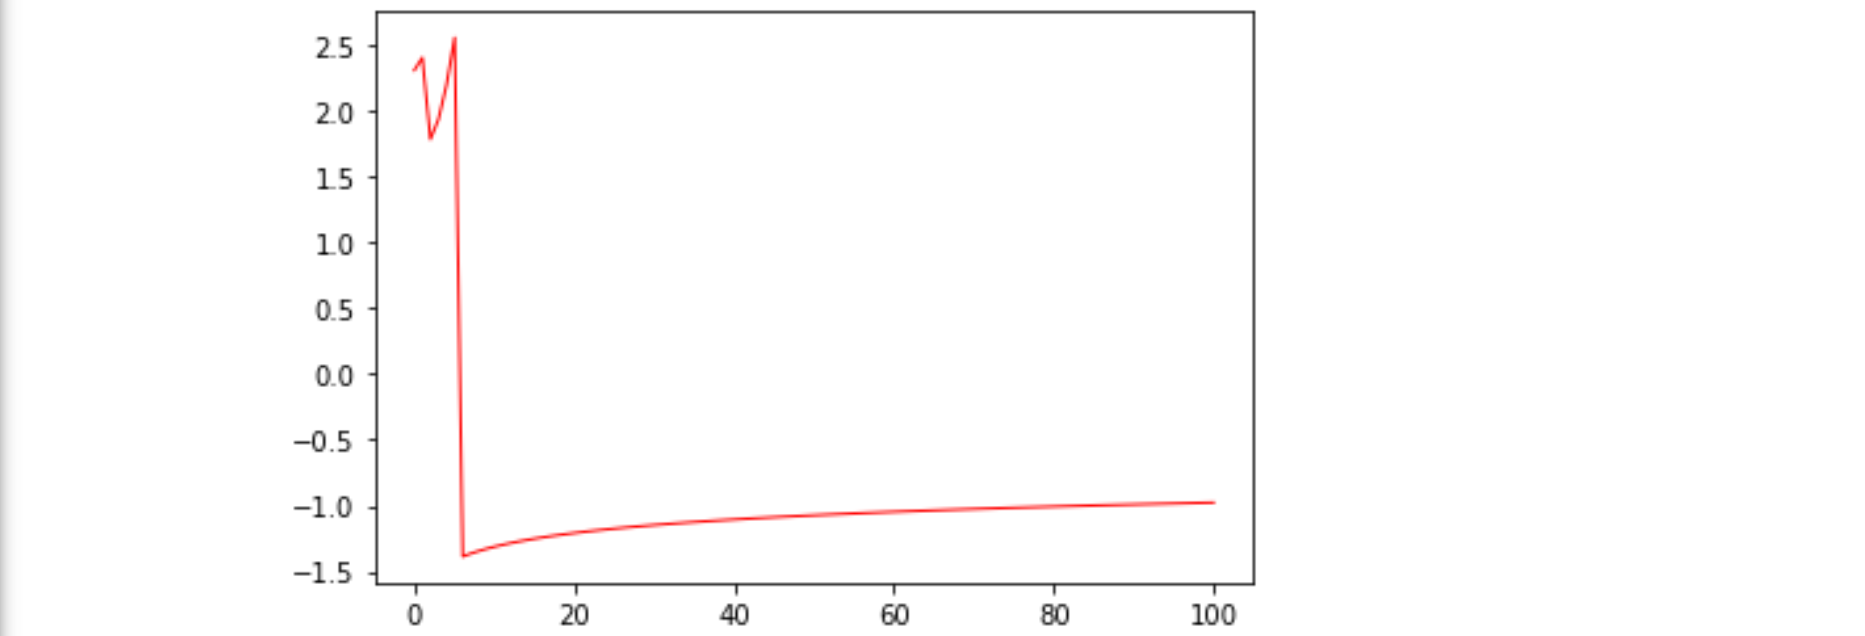
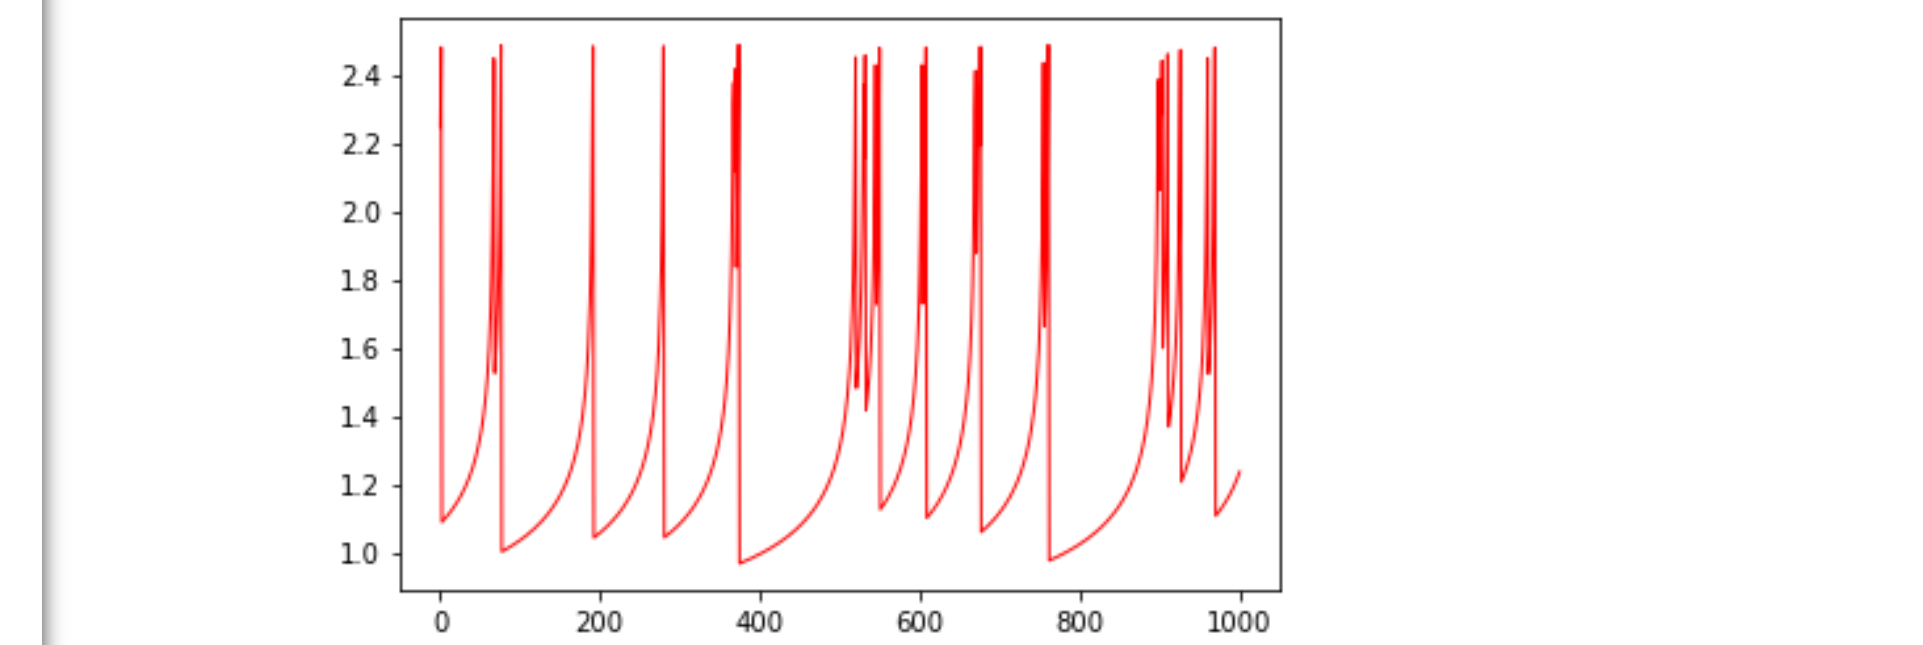

-----------------------------------------------
（另）初值过大时，数值过大报错。
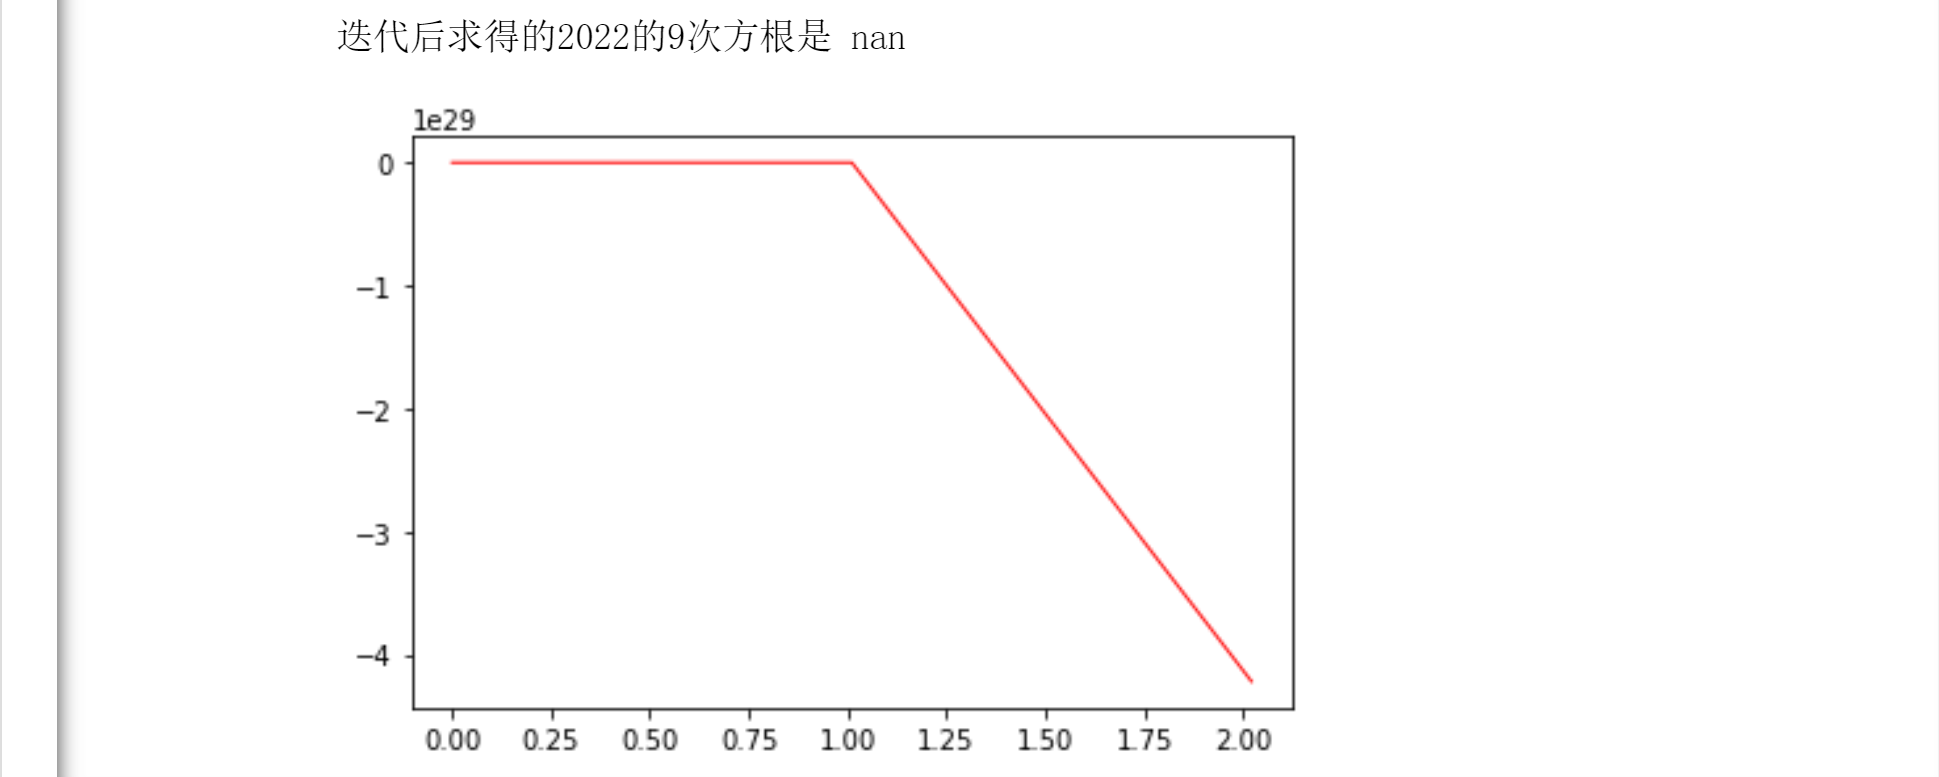

>为回答梁钧钊同学关于初值选取的疑惑，选用等价函数 $  ln(x^9-2021)=0  $（失败）和$  9ln(x)-1n(2022)=0  $（见下），在误差不大时可正常运行。

In [10]:
def f(y,n):
    x=40
    a=0.00001
    while x**n-y>0.1 or x**n-y<-0.1:
        p=a*9/x
        x=x-p
    return x

print(f(2022,9))

2.329758760111374


 ### 四、回顾总结

根据可视化结果，牛顿迭代法法下降最快，只需3~4次便能将根植确定在2.33左右，且几乎不受初值影响。

而梯度下降法高度依赖初值与步长的选择，以上已进行过讨论。

而二分法最具普适性，可只修改给入的函数形式进行调用，例如给入“$exp(x),x**8-5*x$”等含x的函数形式而无需更改其余模块1。

<font color=blue size=2 face=幼圆>可进一步实现的输出：已知函数形式、逼近方法和精度要求，求出其所需循环周期数；更改给定初值，再度观察步长a与结果之间关系；参数传递的形式可再度优化……</font>